<a href="https://colab.research.google.com/github/Winonymous/DataFest2023/blob/main/Building_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

import tensorflow as tf


## Great Function

In [ ]:
def get_classpercentage(df, Class, Subject, sort_values = False):
  returndataset = df.groupby([Class])[Subject].value_counts() # Get all the value count of all the fraudulent transaction
  returndataset = returndataset.unstack().reset_index() # Convert it to a dataframe
  returndataset.set_index(Class, inplace=True)
  returndataset['Percentage'] = returndataset.apply(lambda x: round((x[0] / (x[0] + x[1])) * 100, 2), axis = 1) # Get the percentage fraudulent
  if sort_values:
    return returndataset.sort_values('Percentage', ascending = False)
  else:
    return returndataset

## Import the data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datathon/Fraud Detection Dataset.csv")
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,...,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,...,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,...,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,...,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,...,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


# Preprocessing

## Preprocessing 0: Label encoding the Variables

In [ ]:
categorical_variable = ['Payment Method', 'Country Code',
       'Transaction Type', 'Device Type', 'Browser Type',
       'Operating System', 'Merchant Category', 'User Occupation',
       'User Gender', 'User Account Status', 'Transaction Status',
       'Transaction Time of Day', "User's Device Location",
       'Transaction Currency', 'Transaction Purpose', "User's Email Domain",
       'Transaction Authentication Method', "Merchant ID"]

In [ ]:
for variable in categorical_variable:
  Encoder = LabelEncoder()

  df[variable] = Encoder.fit_transform(df[variable])

In [ ]:
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,3044,1,19,6,10,42.23.223.120,...,26,2.71,37,24,9,343,3,3,5,0
1,85052974,4698,430.74,2021-09-12 15:15:41,3576,0,38,5,18,39.52.212.120,...,60,3.95,18,11,6,688,10,13,18,1
2,23954324,8666,415.74,2023-01-12 17:25:58,3629,20,21,29,34,243.180.236.29,...,81,3.81,24,22,0,371,27,7,33,1
3,44108303,9012,565.89,2021-02-27 11:31:00,2322,10,30,22,16,212.186.227.14,...,18,2.67,30,6,20,687,24,15,32,1
4,66622683,5185,955.49,2022-09-24 04:06:38,6609,39,13,0,27,166.113.10.199,...,98,3.19,14,31,11,605,20,17,21,1


In [ ]:
modeldata = df

## Processing 1: Removing non related Colums

In [ ]:
df.dtypes[df.dtypes == 'object'].index

Index(['Transaction Date and Time', 'IP Address'], dtype='object')

In [ ]:
categorical_variable = ['Payment Method', 'Country Code',
       'Transaction Type', 'Device Type', 'Browser Type',
       'Operating System', 'Merchant Category', 'User Occupation',
       'User Gender', 'User Account Status', 'Transaction Status',
       'Transaction Time of Day', "User's Device Location",
       'Transaction Currency', 'Transaction Purpose', "User's Email Domain",
       'Transaction Authentication Method', "Merchant ID", ]

In [ ]:
relatable = []
notrelatable = []
for variable in categorical_variable:
  percentage = get_classpercentage(df, variable, 'Fraudulent Flag')["Percentage"]
  print(f"{variable} {percentage.min()} {percentage.max()} ")
  if percentage.min() < 45.0 or percentage.max() > 55.0:
    relatable.append(variable)
  else:
    notrelatable.append(variable)

Payment Method 49.8 50.2 
Country Code 49.69 50.35 
Transaction Type 49.76 50.31 
Device Type 49.72 50.3 
Browser Type 49.71 50.28 
Operating System 49.7 50.34 
Merchant Category 49.64 50.32 
User Occupation 49.85 50.29 
User Gender 49.95 50.09 
User Account Status 49.89 50.17 
Transaction Status 49.74 50.21 
Transaction Time of Day 49.97 50.03 
User's Device Location 49.75 50.21 
Transaction Currency 49.69 50.29 
Transaction Purpose 49.62 50.2 
User's Email Domain 49.77 50.35 
Transaction Authentication Method 49.59 50.26 
Merchant ID 42.6 57.06 


In [ ]:
notrelatable

['Payment Method',
 'Country Code',
 'Transaction Type',
 'Device Type',
 'Browser Type',
 'Operating System',
 'Merchant Category',
 'User Occupation',
 'User Gender',
 'User Account Status',
 'Transaction Status',
 'Transaction Time of Day',
 "User's Device Location",
 'Transaction Currency',
 'Transaction Purpose',
 "User's Email Domain",
 'Transaction Authentication Method']

In [ ]:
modeldata = df.drop(notrelatable, axis = 1)

In [ ]:
modeldata.dtypes

Transaction ID                   int64
User ID                          int64
Transaction Amount             float64
Transaction Date and Time       object
Merchant ID                      int64
IP Address                      object
User Age                         int64
User Income                    float64
Location Distance              float64
Time Taken for Transaction     float64
User's Transaction History       int64
Merchant's Reputation Score    float64
User's Credit Score              int64
Merchant's Business Age          int64
Fraudulent Flag                  int64
dtype: object


## Processing 2: Adding a data time column to the dataset

Start with Processing 1 or Processing 2

In [ ]:
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])

In [ ]:
modeldata['Year'] = df['Transaction Date and Time'].dt.year
modeldata['Month'] = df['Transaction Date and Time'].dt.month
modeldata['day'] = df['Transaction Date and Time'].dt.day
modeldata['hour'] = df['Transaction Date and Time'].dt.hour
modeldata['Minute'] = df['Transaction Date and Time'].dt.minute
modeldata['Second'] = df['Transaction Date and Time'].dt.second
modeldata.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,IP Address,User Age,User Income,Location Distance,Time Taken for Transaction,...,Merchant's Reputation Score,User's Credit Score,Merchant's Business Age,Fraudulent Flag,Year,Month,day,hour,Minute,Second
0,51595306,9822,163.08,2023-01-02 07:47:54,3044,42.23.223.120,68,66826.21,9.34,24.22,...,2.71,343,3,0,2023,1,2,7,47,54
1,85052974,4698,430.74,2021-09-12 15:15:41,3576,39.52.212.120,22,89356.71,65.28,55.11,...,3.95,688,13,1,2021,9,12,15,15,41
2,23954324,8666,415.74,2023-01-12 17:25:58,3629,243.180.236.29,71,58438.63,44.05,53.84,...,3.81,371,7,1,2023,1,12,17,25,58
3,44108303,9012,565.89,2021-02-27 11:31:00,2322,212.186.227.14,78,3426.92,21.70,21.62,...,2.67,687,15,1,2021,2,27,11,31,0
4,66622683,5185,955.49,2022-09-24 04:06:38,6609,166.113.10.199,31,53080.12,56.63,53.71,...,3.19,605,17,1,2022,9,24,4,6,38


# Finetune the data

In [ ]:
X = modeldata.drop(["Fraudulent Flag", "Transaction Date and Time", "IP Address", 'Transaction ID'], axis = 1)
y = modeldata["Fraudulent Flag"]

## Perform PCA analysis

In [ ]:
scaler = StandardScaler()
XScaled = scaler.fit_transform(X)

In [ ]:
n_components = 2  # Choose the number of components you want to retain
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(XScaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i}' for i in range(1, n_components + 1)])

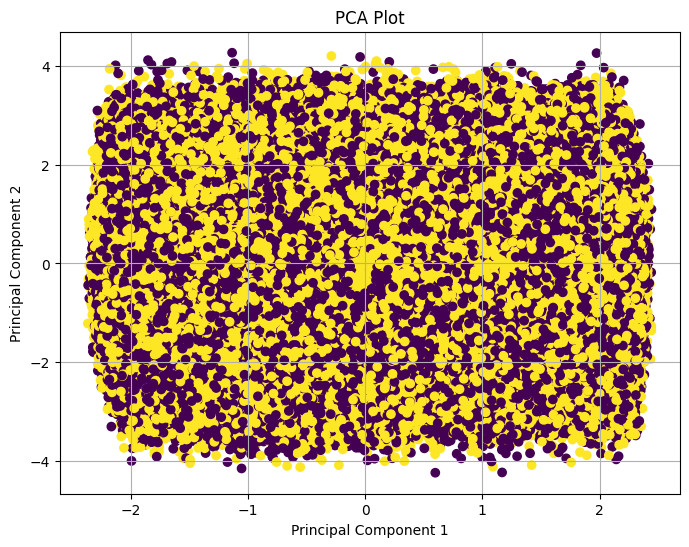

In [ ]:
# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], marker='o', c = y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.grid()
plt.show()

## Train Test Split

The data is quite large so we can use about 80% to train the model

I took a part for training, Testing and Validation Set

In [ ]:
X_traindf, X_test, y_traindf, y_test = train_test_split(XScaled, y, train_size = 0.9)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_traindf, y_traindf, train_size = 0.8)

# Building the Model

## Base Model

In [ ]:
LogModel = LogisticRegression()
LogModel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
LogModel.score(X_test, y_test)

0.49993

In [ ]:
LogModel.predict_proba(X_test)[:, 0]

array([0.49968793, 0.50023536, 0.49950909, ..., 0.49971182, 0.49997689,
       0.50022875])

## Random Model

The data is quite large so ihad to split it into batches

In [ ]:
Model = RandomForestClassifier()

for i in range(0, X_train.shape[0], 1500):
  Model.fit(X_train[i:(1500+i)], y_train[i:(1500+i)])

  print(f"loop {i}: Score {Model.score(X_test, y_test)}")

loop 0: Score 0.5008966666666667
loop 1500: Score 0.499525
loop 3000: Score 0.499335
loop 4500: Score 0.49948
loop 6000: Score 0.5005483333333334
loop 7500: Score 0.4994283333333333
loop 9000: Score 0.5008116666666667
loop 10500: Score 0.5002766666666667
loop 12000: Score 0.49985833333333335
loop 13500: Score 0.5006433333333333
loop 15000: Score 0.50163
loop 16500: Score 0.499
loop 18000: Score 0.5000016666666667
loop 19500: Score 0.49979
loop 21000: Score 0.49951833333333334
loop 22500: Score 0.5005516666666666
loop 24000: Score 0.49877333333333335
loop 25500: Score 0.501015
loop 27000: Score 0.5006416666666667
loop 28500: Score 0.499725
loop 30000: Score 0.500185
loop 31500: Score 0.4996
loop 33000: Score 0.5009133333333333
loop 34500: Score 0.5005283333333334
loop 36000: Score 0.49983
loop 37500: Score 0.498815
loop 39000: Score 0.50063
loop 40500: Score 0.49892333333333333
loop 42000: Score 0.4994883333333333
loop 43500: Score 0.4989633333333333
loop 45000: Score 0.5002516666666667

## Naivebayes

In [ ]:
gnb = GaussianNB()

for i in range(0, X_train.shape[0], 10000):
  gnb.fit(X_train[i:(1500+i)], y_train[i:(1500+i)])

  print(f"loop {i}: Score {gnb.score(X_test, y_test)}")

## XGBoost Model

In [ ]:
TrainData = X_train
TrainData["Fraudulent Flag"] = y_train

In [ ]:
TrainData.to_csv('traindataset.csv')

In [ ]:
gen_data = pd.read_csv('traindataset.csv', chunksize=1000)

In [ ]:
class make_model():
    def __init__(self,param,num_round=300):
        self.param=param
        self.num_round=num_round
    def fit(self,gen_data):
        iteration = 0

        for df in gen_data:
            dtrain = xgb.DMatrix(np.array(df[X_train.columns]), label=df["Fraudulent Flag"])
            if iteration ==0:
                model = xgb.Booster(self.param, [dtrain])
            model = xgb.train(self.param,dtrain,num_boost_round=1, xgb_model=model)
            iteration += 1

        self.model_=model
    def predict(self,X):
        dtest=xgb.DMatrix(X)
        return self.model_.predict(dtest)>0.5 # use argmax in non-binary classification
parameters = {'max_depth':5, "booster":"gbtree"} # parameters to tune, see xgboost doc. Can be used to make boosted trees or Random Forests.
model = make_model(parameters)
model.fit(gen_data)
xgb.plot_importance(model.model_)

## Deep Learning Model

In [ ]:
import tensorflow as tf

# The model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'ReLU'),
    tf.keras.layers.Dense(10, activation = 'ReLU'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['Accuracy'])

# FIt the model
model_1.fit(X_train, y_train, epochs = 5)

## Conclusion

Due to lack of time I have not been able to properly evaluate the model.